### **DATA ANALYSIS PYTHON PROJECT - BLINKIT ANALYSIS**

#### **IMPORT LIBRARIES**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### **IMPORT RAW DATA**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path = '/content/drive/MyDrive/data sets /blinkit_data.csv'
df= pd.read_csv(path)

In [91]:
df

,item_fat_content,item_identifier,item_type,outlet_establishment_year,outlet_identifier,outlet_location_type,outlet_size,outlet_type,item_visibility,item_weight,sales,rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,Low Fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,Low Fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,Low Fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,Regular,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0


### **Size of data**

In [7]:
print("Size of data :",df.shape)

Size of data : (8523, 12)


## **Changing Heading**

In [8]:
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(' ','_')

**Data Info**

In [23]:
df.columns

Index(['item_fat_content', 'item_identifier', 'item_type',
       'outlet_establishment_year', 'outlet_identifier',
       'outlet_location_type', 'outlet_size', 'outlet_type', 'item_visibility',
       'item_weight', 'sales', 'rating'],
      dtype='object')

**Data types**

In [9]:
df.dtypes

,0
item_fat_content,object
item_identifier,object
item_type,object
outlet_establishment_year,int64
outlet_identifier,object
outlet_location_type,object
outlet_size,object
outlet_type,object
item_visibility,float64
item_weight,float64


**Identification and cleaning of Item Fat Content**

In [10]:
df['item_fat_content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [11]:
df['item_fat_content']=df['item_fat_content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [12]:
df['item_fat_content'].groupby(df['item_fat_content']).count()

,item_fat_content
item_fat_content,
Low Fat,5517
Regular,3006


### **Business Requiremennts**


### **KPI's REQUIREMENTs**

In [29]:
#Total_Sales
total_sales=df['sales'].sum().round(2)
print("total_sales:",total_sales)

#average sales
avg_sales=df['sales'].mean().round()
print("avg_sales:",avg_sales)


#no of items sold
no_of_items_sold=df['sales'].count()
print("no_of_items_sold:",no_of_items_sold)

#average ratings

avg_rating=df['rating'].mean().round(0)
print("avg_rating:",avg_rating)


total_sales: 1201681.48
avg_sales: 141.0
no_of_items_sold: 8523
avg_rating: 4.0


### **CHARTS REQUIREMENTS**

**total sales by fat content**

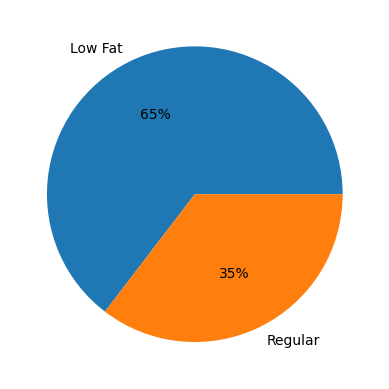

In [33]:
sales_by_fat=df.groupby('item_fat_content')['sales'].sum().round(2)
sales_by_fat

plt.pie(sales_by_fat,labels=sales_by_fat.index,autopct='%0.0f%%')
plt.show()

**Total Sales By Item Type**

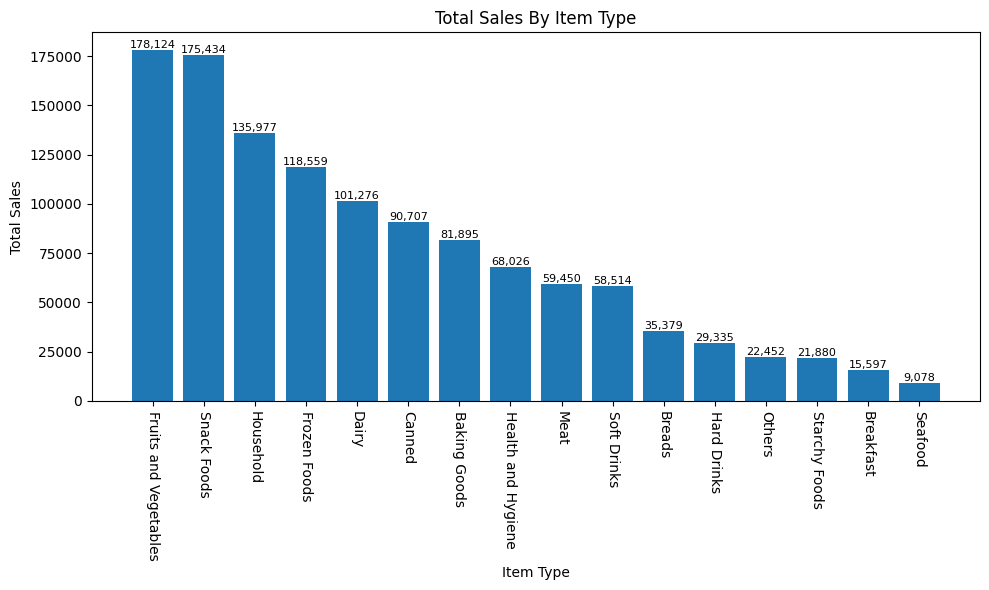

In [67]:
sales_by_type=df.groupby('item_type')['sales'].sum().sort_values(ascending=False).round()
sales_by_type

plt.figure(figsize=(10,6))
bars=plt.bar(sales_by_type.index,sales_by_type.values)


plt.xticks(rotation=-90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales By Item Type')

for bar in bars:
  plt.text(bar.get_x()+bar.get_width()/2,
           bar.get_height(),f'{bar.get_height():,.0f}',ha='center',va='bottom',fontsize=8)

plt.tight_layout()
plt.show()

**FAT content BY Outlet for Total Sales**

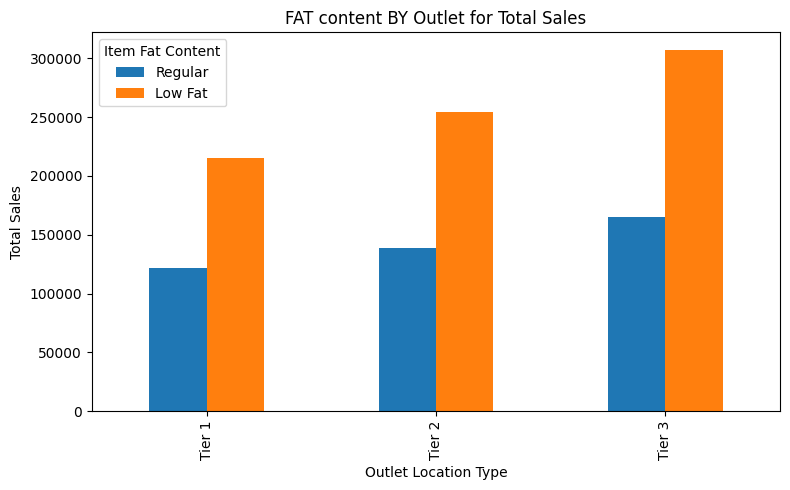

In [72]:
grouped=df.groupby(['outlet_location_type','item_fat_content'])['sales'].sum().unstack().round()
grouped=grouped[['Regular','Low Fat']]

bx= grouped.plot(kind='bar',figsize=(8,5),title='FAT content BY Outlet for Total Sales')
bx.set_xlabel('Outlet Location Type')
bx.set_ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

**Total Sales by Outlet Establishment**

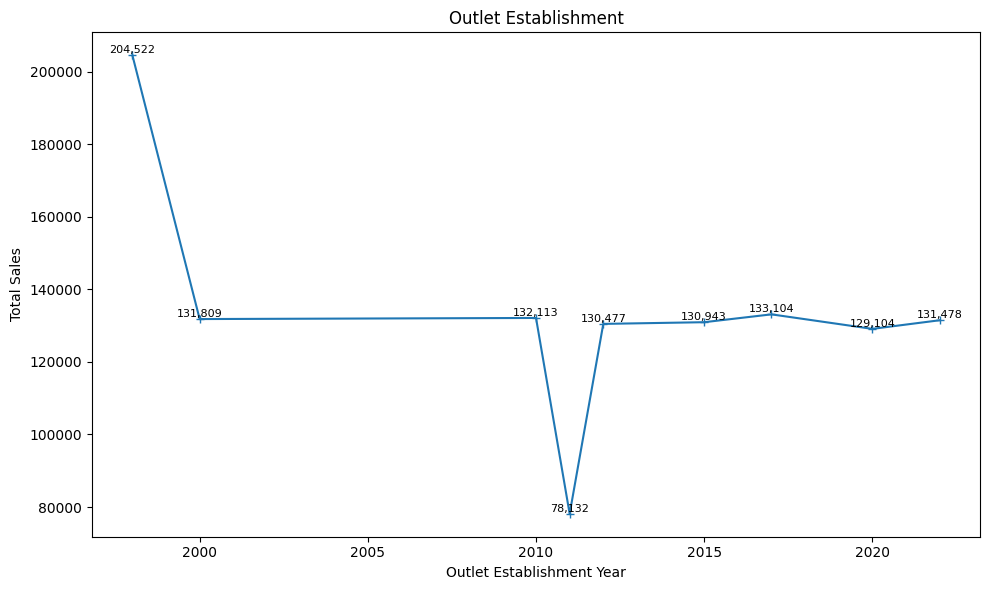

In [90]:
sales_by_year=df.groupby('outlet_establishment_year')['sales'].sum().sort_index(ascending=False).round()
sales_by_year

plt.figure(figsize=(10,6))
plt.plot(sales_by_year.index,sales_by_year.values,marker='+',linestyle='-')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')

for x,y in zip(sales_by_year.index,sales_by_year.values):
  plt.text(x,y,f'{y:,.0f}',ha='center',va='bottom',fontsize=8)

plt.tight_layout()
plt.show()

**Sales By Outlet Size**

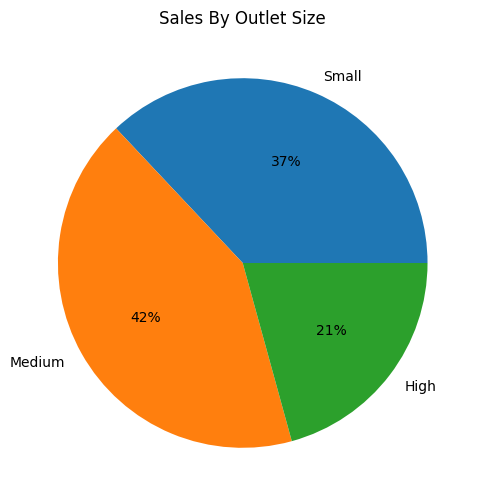

In [94]:
sales_by_outlet_size=df.groupby('outlet_size')['sales'].sum().sort_index(ascending=False).round()
sales_by_outlet_size

plt.figure(figsize=(10,6))
plt.pie(sales_by_outlet_size,labels=sales_by_outlet_size.index,autopct='%0.0f%%')
plt.title('Sales By Outlet Size')
plt.show()

**Sales By Outlet Location**

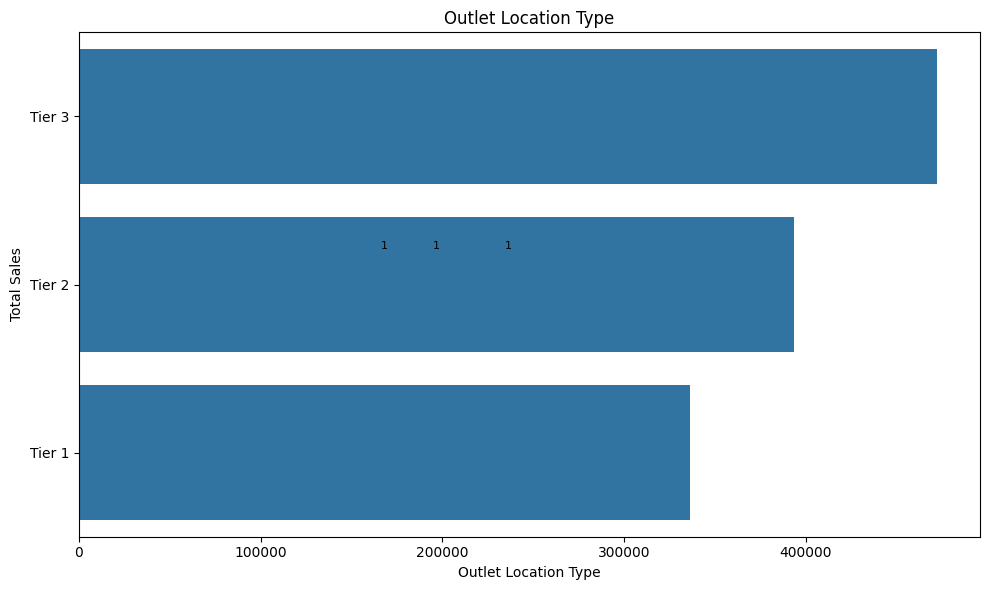

In [104]:
sales_by_outlet_location = df.groupby('outlet_location_type')['sales'].sum().sort_index(ascending=False).round().reset_index()
# Convert the Series to a DataFrame using reset_index()

plt.figure(figsize=(10,6))
ax = sns.barplot(x='sales', y='outlet_location_type', data=sales_by_outlet_location, orient='h') # Now, sales_by_outlet_location is a DataFrame
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.title('Outlet Location Type')

for bar in ax.patches:
  plt.text(bar.get_x()+bar.get_width()/2,
           bar.get_height(),f'{bar.get_height():,.0f}',ha='center',va='bottom',fontsize=8)
plt.tight_layout()
plt.show()